# Gráficos e cálculos - lista 1 (Mecânica Estatística)
### Felipe Reibnitz Willemann (10740078)

In [2]:
# importanto pacotes:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import scipy.linalg as linalg

Questão 6:
=========

Um gás contém frações $n_{A}$ e $n_{B}$ de partículas dos tipos *A* e *B*, cujas energias estão associadas a distribuições $P_{A}(E)$ e $P_{B}(E)$, com $0 \leqslant E \leqslant E_{0}$. Dado que uma partícula tem energia maior que $E_0$, determine a probabilidade de que se trate de uma partícula do tipo A.

Esse foi o código usado para calcular o teste feito com distriuições exponenciais:

In [425]:
# número de partículas e as frações dos tipos A e B:
N = 1000
n_A = 0.65
n_B = 1 - n_A

# parâmetros para as distribuições:
alpha_A = 1.4
alpha_B = 0.9
E_0 = 1.1

# lista onde vão ser guardados as P(E>=E_0|A):
prob = []

# cálculo de 10000 P(E>=E_0|A):
for i in range(10000):
    # séries de pandas com as energias das partículas dos tipos A e B: 
    part_A = pd.Series(np.random.exponential(1/alpha_A, int(N*n_A)))
    part_B = pd.Series(np.random.exponential(1/alpha_B, int(N*n_B)))
    
    # número de partículas do tipo A com energia E >= E_0:
    num_A = part_A.apply(lambda x: x>=E_0).sum()
    
    # número de partículas do tipo A com energia E >= E_0:
    num_B = part_B.apply(lambda x: x>=E_0).sum()
    
    #ccálculo de P(E>=E_0|A):
    prob.append(num_A/(num_A+num_B))

# resultado exato para o cálculo analítico:
resultado_exato = 1/(1+n_B*np.exp(E_0*(alpha_A-alpha_B))/n_A)

# parâmetros do ajuste gaussiano para a distribuição das P(E>=E_0|A):
(mu, sigma) = stats.norm.fit(np.array(prob))

print('resultado exato : ',resultado_exato,'\nresultado do fit :',mu,'\ndesvio padrão : ',sigma)

resultado exato :  0.5172529497565653 
resultado do fit : 0.5178354584109365 
desvio padrão :  0.02570581922261854


-----------------------
Código do gŕafico das distribuições de energias das partículas:

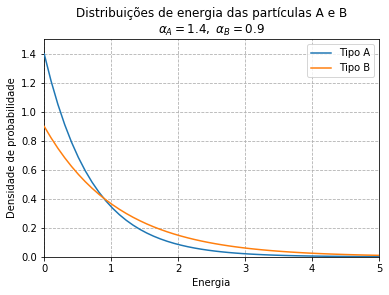

In [12]:
# parâmetros:
alpha_A = 1.4
alpha_B = 0.9

# calculando os pontos que seram plotados:
E = np.linspace(0, 5, 50)
dist_A = alpha_A*np.exp(-alpha_A*E)
dist_B = alpha_B*np.exp(-alpha_B*E)

# plot dos gráficos e seus elementos:
plt.plot(E, dist_A, E, dist_B, zorder=4) 
plt.xlim([0, 5]) 
plt.ylim([0, 1.5]) 
plt.title('Distribuições de energia das partículas A e B\n' + r'$\alpha_A=%.1f,\ \alpha_B=%.1f$' %(alpha_A, alpha_B)) 
plt.xlabel('Energia') 
plt.ylabel('Densidade de probabilidade') 
plt.legend(['Tipo A', 'Tipo B', 'Et'])
plt.grid(axis='both', ls='--', zorder=1)

plt.savefig('dist_exp.png', dpi=300)
plt.show()

--------------------
Código do histrograma de P(E>=E_0|A):

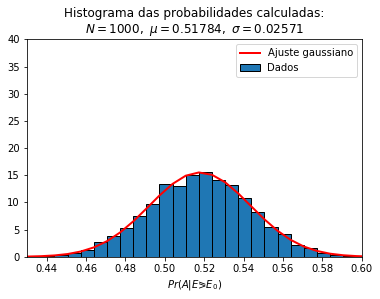

In [426]:
# construção do histograma:
count, bins, ignored = plt.hist(prob, 30, histtype='bar', ec='black', density=True)

# plot do ajuste gaussiano:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2)),
         linewidth=2, color='r')

# elementos do histograma:
plt.title('Histograma das probabilidades calculadas:\n' + r'$N=%.0f,\ \mu=%.5f,\ \sigma=%.5f$' %(N, mu, sigma)) 
plt.xlim(0.43, 0.6)
plt.xlabel(r'$Pr(A|E \eqslantgtr E_0)$')
plt.ylim(0, 40)
plt.legend(['Ajuste gaussiano', 'Dados'])

plt.savefig('hist_' + str(N) + '.png', dpi=300)
plt.show()

Questão 8:
=========

a) Cálculo dos $\Delta\lambda$ para as matrizes simétricas com elementos aleatórios associados à uma distribuição gaussiana de média $0$ e desvio padrão $1$

Esse foi o código usado:

In [10]:
# constantes a serem usadas
N = 2
M = 10000
delta_lambda = []

for i in range(M):
    # matriz NxN gaussiana aleatória
    m = np.random.normal(0, 1, (N, N))
    
    #cálculo dos autovalores para a média da matriz com a sua transposta:
    autovalores = linalg.eigvals((m+m.T)/2)
    autovalores.sort()
    delta_lambda.append(linalg.norm(autovalores[int(N/2)] - autovalores[int(N/2) - 1]))

# então tomamos uma normalização dos dados pela média
media = np.array(delta_lambda).mean()
delta_lambda_normalizado = np.array(delta_lambda)/media

print(delta_lambda_normalizado)

[1.77866641 0.683922   0.4840113  ... 1.55808175 0.60340794 1.01365686]


--------------------------------------------------
g) Repetição do item (a) mas para matrizes simétricas com elementos aleatórios $\pm 1$

In [13]:
# constantes a serem usadas:
N = 10
M = 10000
delta_lambda = []

for i in range(M):
    # matriz simétrica aleatória:
    m = np.random.randint(0, 2, (N,N))*2 - 1
    m_sym = (m + m.T)/2
    
    # randomizando os elementos que ficaram nulos depois da média, e mantendo a simetria:
    for i in range(len(m_sym)):
        for j in range(i+1, len(m_sym)):
            if m_sym[i][j] == 0:
                n = np.random.randint(0, 2)*2 - 1
                m_sym[i][j], m_sym[j][i] = n, n
    
    # cálculo dos autovalores:
    autovalores = linalg.eigvals(m_sym)
    autovalores.sort()
    delta_lambda.append(linalg.norm(autovalores[int(N/2)] - autovalores[int(N/2) - 1]))

# média e normalização:
media = np.array(delta_lambda).mean()
delta_lambda_normalizado = np.array(delta_lambda)/media

print(delta_lambda_normalizado)

[1.76782701e-01 1.67416882e+00 7.05889090e-16 ... 6.79340501e-01
 2.43517864e+00 1.49767295e-01]


---------------
Código para os histogramas:

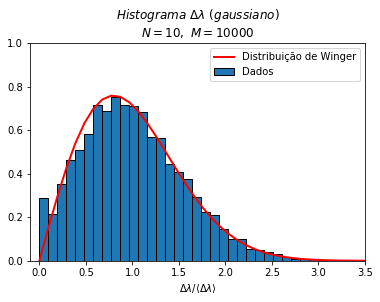

In [14]:
# construção do histograma:
count, bins, ignored = plt.hist(delta_lambda_normalizado, 40, histtype='bar', ec='black', density=True)

# função a ser ajustada:
winger = np.pi * bins * np.exp(- np.pi * bins ** 2 / 4) / 2
plt.plot(bins, winger, linewidth=2, color='r')

# elementos do histograma:
plt.title(r'$Histograma\ \Delta\lambda\ (gaussiano)$' + '\n' + r'$N=%.0f,\ M=%.0f$' %(N, M))
plt.legend(['Distribuição de Winger','Dados'])
plt.xlabel(r'$\Delta\lambda/\langle\Delta\lambda\rangle$')
plt.xlim(-0.1, 3.5)
plt.ylim(0, 1)

plt.savefig('ex8_gauss_' + str(N) + '.png', dpi=300)
plt.show()